In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
book_sales = pd.read_csv('./book_sales (1).csv',index_col='Date',
                         parse_dates=['Date'],).drop('Paperback', axis=1)

book_sales.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [6]:
book_sales['Time'] = np.arange(len(book_sales.index))
book_sales.head()


,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [7]:
book_sales['lag_1'] = book_sales['Hardcover'].shift(1)
book_sales.head()

,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


In [9]:
book_sales = book_sales.reindex(columns=['Hardcover','Time','lag_1'])
book_sales.head()

,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0
2000-04-04,139,3,172.0
2000-04-05,191,4,139.0


In [10]:
ar = pd.read_csv('./ar.csv')
ar.head()


,ar1,ar2
0,0.541286,-1.234475
1,-1.692950,3.532498
2,-1.730106,-3.915508
3,-0.783524,2.820841
4,-1.796207,-1.084120


In [19]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv('./train.csv',
                          dtype=dtype,
                          parse_dates=['date'],
                          infer_datetime_format=True)
store_sales.head()

C:\Users\91972\AppData\Local\Temp\ipykernel_21200\3919119404.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv('./train.csv',


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [20]:
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr','family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

In [21]:
store_sales.head()

id  sales  onpromotion
date       store_nbr family                            
2013-01-01 1         AUTOMOTIVE   0    0.0            0
                     BABY CARE    1    0.0            0
                     BEAUTY       2    0.0            0
                     BEVERAGES    3    0.0            0
                     BOOKS        4    0.0            0

In [23]:
average_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
Freq: D, Name: sales, dtype: float32

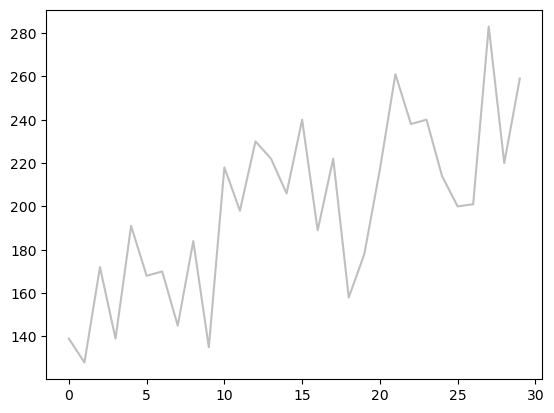

In [24]:
fig , ax = plt.subplots()
ax.plot('Time','Hardcover', data = book_sales, color= '0.75')


Text(0.5, 1.0, 'time plot of hardcover Sales')

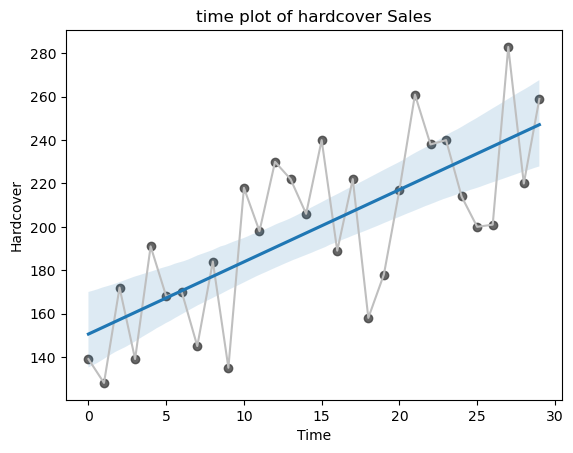

In [28]:
fig , ax = plt.subplots()
ax.plot('Time','Hardcover', data = book_sales, color= '0.75')

ax = sns.regplot(x = 'Time', y = 'Hardcover', data = book_sales, scatter_kws= dict(color = '0.25'))
ax.set_title('time plot of hardcover Sales')

Text(0.5, 1.0, 'Series 2')

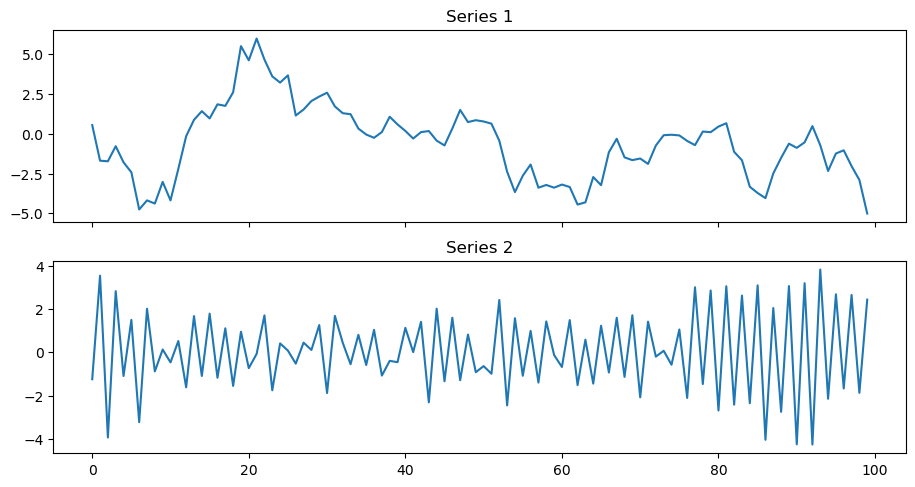

In [32]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize = (11,5.5) , sharex = True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2')

In [33]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()
df.head()

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390808
2013-01-03,202.840195
2013-01-04,198.911163
2013-01-05,267.873260


In [34]:
time = np.arange(len(df.index))
df['time'] = time

df.head()

,sales,time
date,,
2013-01-01,1.409438,0
2013-01-02,278.390808,1
2013-01-03,202.840195,2
2013-01-04,198.911163,3
2013-01-05,267.873260,4


In [35]:
X = df.loc[:,['time']]
y = df.loc[:,'sales']

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index = X.index)
y_pred.head()

date
2013-01-01    194.232790
2013-01-02    194.427137
2013-01-03    194.621484
2013-01-04    194.815831
2013-01-05    195.010178
Freq: D, dtype: float64

Text(0.5, 1.0, 'time plot of total store sales')

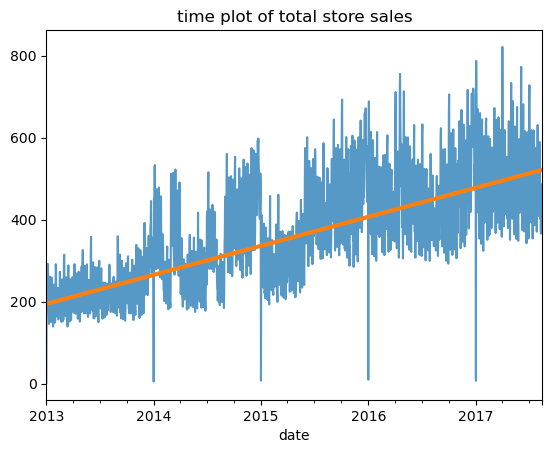

In [41]:
ax = y.plot(alpha = 0.75)
ax = y_pred.plot(ax=ax,linewidth = 3)
ax.set_title('time plot of total store sales')

In [42]:
df = average_sales.to_frame()
lag_1 = df['sales'].shift(1)
df.head()

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390808
2013-01-03,202.840195
2013-01-04,198.911163
2013-01-05,267.873260


In [43]:
df['lag_1'] = lag_1
df.head()

,sales,lag_1
date,,
2013-01-01,1.409438,NaN
2013-01-02,278.390808,1.409438
2013-01-03,202.840195,278.390808
2013-01-04,198.911163,202.840195
2013-01-05,267.873260,198.911163


In [44]:
X = df.loc[:,['lag_1']].dropna()
y = df.loc[:,'sales']
y,X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)


[None,
 Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'lag_1'),
 Text(0.5, 1.0, 'Lag Plot of Average Sales')]

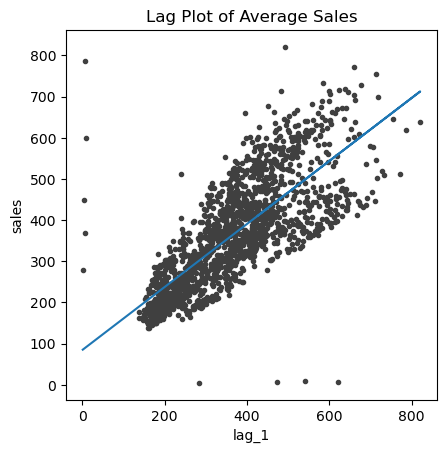

In [46]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales')